In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import f_oneway
from numpy import corrcoef
import operator
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import f_classif

In [2]:
df = pd.read_csv('kidney_disease.csv', index_col = 'id')
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df = df.dropna()

In [4]:
for col in df.columns:
    if df[col].dtype == 'O':
        df[col] = LabelEncoder().fit_transform(df[col])

In [5]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11,42,14,1,0,0,1,1,1,0
9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,70.0,...,8,11,12,1,1,0,1,0,1,0
11,63.0,70.0,1.010,3.0,0.0,0,0,1,0,380.0,...,11,25,13,1,1,0,1,1,0,0
14,68.0,80.0,1.010,3.0,2.0,1,0,1,1,157.0,...,0,8,2,1,1,1,1,1,0,0
20,61.0,80.0,1.015,2.0,0.0,0,0,0,0,173.0,...,4,63,7,1,1,1,1,1,1,0


In [6]:
x = df.drop( ["classification"], axis = 1)
y = df["classification"]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [8]:
pearsoncorr = x_train.corr(method='pearson')
pearsoncorr

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
age,1.000000,0.072854,-0.397066,0.340853,0.243386,-0.228422,-0.276336,0.158512,0.179247,0.329424,...,-0.318390,-0.274370,-0.209909,-0.299486,0.401116,0.377703,0.278990,0.239059,0.295144,0.069190
bp,0.072854,1.000000,-0.278324,0.353795,0.205140,-0.387495,-0.203210,0.247812,0.232325,0.145923,...,-0.314421,-0.330162,-0.042898,-0.323475,0.366088,0.195713,0.227559,0.222423,0.136254,0.313571
sg,-0.397066,-0.278324,1.000000,-0.695890,-0.495571,0.507018,0.617322,-0.469402,-0.503324,-0.603550,...,0.692961,0.660937,0.279201,0.638340,-0.686070,-0.665522,-0.444477,-0.536185,-0.633530,-0.412899
al,0.340853,0.353795,-0.695890,1.000000,0.527799,-0.480498,-0.745186,0.541518,0.511253,0.536515,...,-0.770308,-0.701176,-0.234464,-0.668964,0.825760,0.694973,0.375903,0.574400,0.651785,0.517986
su,0.243386,0.205140,-0.495571,0.527799,1.000000,-0.311930,-0.340364,0.195847,0.456119,0.738444,...,-0.360811,-0.357092,-0.081469,-0.373233,0.588139,0.594089,0.488790,0.267610,0.426358,0.084709
rbc,-0.228422,-0.387495,0.507018,-0.480498,-0.311930,1.000000,0.445789,-0.197579,-0.164058,-0.530213,...,0.462979,0.483867,0.173123,0.425897,-0.510885,-0.524157,-0.278680,-0.448640,-0.270135,-0.298169
pc,-0.276336,-0.203210,0.617322,-0.745186,-0.340364,0.445789,1.000000,-0.632797,-0.455750,-0.439631,...,0.766540,0.705958,0.144395,0.716381,-0.713024,-0.660251,-0.414815,-0.543434,-0.610591,-0.600003
pcc,0.158512,0.247812,-0.469402,0.541518,0.195847,-0.197579,-0.632797,1.000000,0.479551,0.280599,...,-0.591590,-0.490432,-0.248555,-0.545859,0.446278,0.380061,0.412470,0.419172,0.308895,0.512133
ba,0.179247,0.232325,-0.503324,0.511253,0.456119,-0.164058,-0.455750,0.479551,1.000000,0.374646,...,-0.425617,-0.452538,-0.105356,-0.389326,0.408047,0.393311,0.374591,0.152571,0.383571,0.204808
bgr,0.329424,0.145923,-0.603550,0.536515,0.738444,-0.530213,-0.439631,0.280599,0.374646,1.000000,...,-0.417531,-0.423659,-0.219331,-0.434828,0.570553,0.648645,0.417237,0.408177,0.370087,0.094022


<AxesSubplot:>

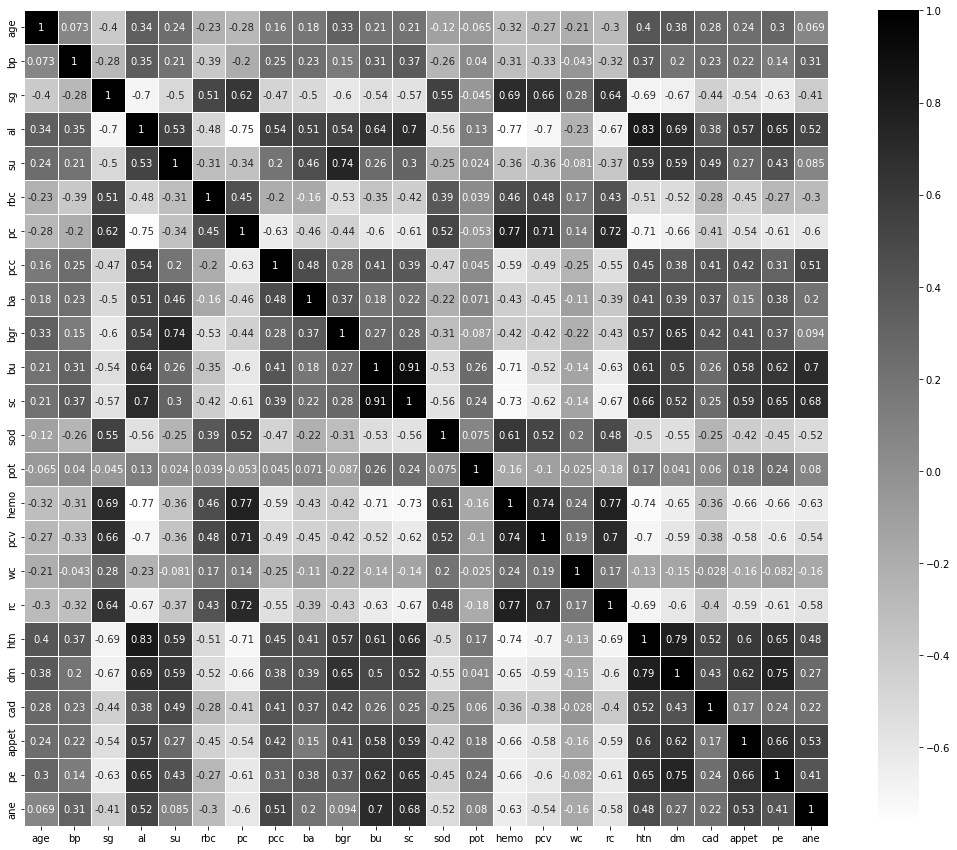

In [9]:
plt.figure(figsize = (18,15))
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='binary',
            annot=True,
            linewidth=0.5)

In [10]:
#Selecting highly correlated features using Pearsons Correlation
def correlation(threshold):
    col_corr = set()
    corr_matrix = pearsoncorr
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j] > threshold):
            #if (corr_matrix.iloc[i, j] > threshold):
                col_corr.add(corr_matrix.columns[i])
    return col_corr

In [11]:
#select features with 75% threshold
corr_features = correlation(0.75)
corr_features

{'dm', 'hemo', 'htn', 'rc', 'sc'}

In [12]:
#Correlation matrix and upper triangular matrix
cm = pearsoncorr.abs()
ut = cm.where(np.triu(np.ones(cm.shape),k=1).astype(bool))
todrop = {column for column in ut.columns if any(ut[column] > 0.75)}
todrop

{'dm', 'hemo', 'htn', 'rc', 'sc'}

In [13]:
#MRMr implementation

class MRMR:
    def __init__(self, df, target_name, difference_or_quotient='difference'):
        self.df = df
        self.idxs_by_class = [df[df[target_name] == v].index for v in df[target_name].unique()]
        self.features = [col for col in df.columns if col != target_name]
        self.ranked_features = []
        self.feature_relevance = {feat_name: self.calc_feature_relevance(self.df[feat_name]) for feat_name in
                                  self.features}
        self.use_difference = difference_or_quotient == 'difference'
        self.calculated_correlations = {}

    def calc_feature_relevance(self, feature):
        groups = [feature[class_idxs].values for class_idxs in self.idxs_by_class]
        return f_oneway(*groups).statistic

    def calc_feature_redundancy(self, feature):
        redundancy = 0
        for feat in self.ranked_features:
            if (feat, feature) not in self.calculated_correlations:
                self.calculated_correlations[(feat, feature)] = abs(corrcoef(self.df[feature], self.df[feat])[1, 0])
                self.calculated_correlations[(feature, feat)] = abs(corrcoef(self.df[feature], self.df[feat])[1, 0])

            redundancy += self.calculated_correlations[(feat, feature)]
        return redundancy

    def rank_features(self):
        most_important_feature = max(self.feature_relevance.items(), key=operator.itemgetter(1))[0]
        self.ranked_features.append(most_important_feature)

        while len(self.ranked_features) != len(self.features):
            top_importance = 0
            most_important_feature = None
            for feat in self.features:
                if feat in self.ranked_features:
                    continue

                feature_redundancy = self.calc_feature_redundancy(feat)
                feature_relevance = self.feature_relevance[feat]
                if self.use_difference:
                    importance = feature_relevance - feature_redundancy
                else:
                    importance = feature_relevance / feature_redundancy

                if importance > top_importance:
                    top_importance = importance
                    most_important_feature = feat

            self.ranked_features.append(most_important_feature)

        return self.ranked_features

In [14]:
different_ranking_methods = {}

In [15]:
f_scores = f_classif(x, y)[0]
f_scores = pd.Series(f_scores, index=[col for col in df.columns if col!='classification']).sort_values(ascending=False)
different_ranking_methods['anova_f_statistic'] = f_scores.index

In [16]:
mrmr = MRMR(df, 'classification')
different_ranking_methods['mrmr_difference_based'] = mrmr.rank_features()

In [17]:
mrmr = MRMR(df, 'classification', difference_or_quotient='quotient')
different_ranking_methods['mrmr_quotient_based'] = mrmr.rank_features()

In [18]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(x_train, y_train)
rfc_features = pd.Series(model.feature_importances_, index=mrmr.features).sort_values(ascending=False)
different_ranking_methods['random_forest_feature_ranking'] = rfc_features.index

In [19]:
pd.DataFrame(different_ranking_methods)

,anova_f_statistic,mrmr_difference_based,mrmr_quotient_based,random_forest_feature_ranking
0,al,al,al,al
1,htn,htn,htn,sc
2,hemo,hemo,hemo,hemo
3,pcv,pcv,sg,pcv
4,sg,sg,pcv,rc
5,pc,pc,pc,sg
6,dm,dm,dm,htn
7,rc,rc,rc,bu
8,sc,sc,sc,pc
9,bu,bu,bu,dm


In [20]:
from mrmr import mrmr_classif
selected_features = mrmr_classif(X=x, y=y, K=10)
print(selected_features)
print(corr_features)
print(todrop)

100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 136.60it/s]

['al', 'htn', 'hemo', 'sg', 'pcv', 'pc', 'dm', 'rc', 'sc', 'bu']
{'htn', 'sc', 'hemo', 'dm', 'rc'}
{'htn', 'sc', 'hemo', 'dm', 'rc'}


In [21]:
selected_features = [i for i in selected_features if i not in corr_features.union(todrop)]
selected_features

['al', 'sg', 'pcv', 'pc', 'bu']

In [22]:
#https://github.com/smazzanti/mrmr
#https://elliot-weissberg.medium.com/another-feature-selection-algorithm-mrmr-3827b6b19e33

Weight for the classification accuracy [0-1]: .75
Enter the percentage of data wanted for valdiation [0, 100]: 1

                          Iteration - 1


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9375
Number of Features: 6
----------------------------------------

Particle 1 - Fitness: 0.9375, Number of Features: 6
Particle 2 - Fitness: 0.9270833333333334, Number of Features: 7
Particle 3 - Fitness: 0.9270833333333334, Number of Features: 7
Particle 4 - Fitness: 0.9270833333333334, Number of Features: 7
Particle 5 - Fitness: 0.9166666666666666, Number of Features: 8
Particle 6 - Fitness: 0.9166666666666666, Number of Features: 8
Particle 7 - Fitness: 0.9166666666666666, Number of Features: 8
Particle 8 - Fitness: 0.9166666666666666, Number of Features: 8
Particle 9 - Fitness: 0.9166666666666666, Number of Features: 8
Particle 10 - Fitness: 0.9166666666666666, Number of Features: 8
Particle 11 - Fitness: 0.90625, Number of Features: 9
Particle 12 - Fitn


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9375
Number of Features: 6
----------------------------------------

Particle 1 - Fitness: 0.9375, Number of Features: 6
Particle 2 - Fitness: 0.9375, Number of Features: 6
Particle 3 - Fitness: 0.9270833333333334, Number of Features: 7
Particle 4 - Fitness: 0.90625, Number of Features: 9
Particle 5 - Fitness: 0.90625, Number of Features: 9
Particle 6 - Fitness: 0.90625, Number of Features: 9
Particle 7 - Fitness: 0.90625, Number of Features: 9
Particle 8 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 9 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 10 - Fitness: 0.875, Number of Features: 12
Particle 11 - Fitness: 0.8645833333333334, Number of Features: 13
Particle 12 - Fitness: 0.8645833333333334, Number of Features: 13
Particle 13 - Fitness: 0.8541666666666666, Number of Features: 14
Particle 14 - Fitness: 0.8541666666666666, Number of Features: 14
Particle 15 - Fitness: 0.8437


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9375
Number of Features: 6
----------------------------------------

Particle 1 - Fitness: 0.9375, Number of Features: 6
Particle 2 - Fitness: 0.9270833333333334, Number of Features: 7
Particle 3 - Fitness: 0.9270833333333334, Number of Features: 7
Particle 4 - Fitness: 0.9270833333333334, Number of Features: 7
Particle 5 - Fitness: 0.9166666666666666, Number of Features: 8
Particle 6 - Fitness: 0.9166666666666666, Number of Features: 8
Particle 7 - Fitness: 0.90625, Number of Features: 9
Particle 8 - Fitness: 0.90625, Number of Features: 9
Particle 9 - Fitness: 0.8958333333333334, Number of Features: 10
Particle 10 - Fitness: 0.8958333333333334, Number of Features: 10
Particle 11 - Fitness: 0.8958333333333334, Number of Features: 10
Particle 12 - Fitness: 0.8958333333333334, Number of Features: 10
Particle 13 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 14 - Fitness: 0.8854166666666666, Number


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9270833333333334
Number of Features: 7
----------------------------------------

Particle 1 - Fitness: 0.9270833333333334, Number of Features: 7
Particle 2 - Fitness: 0.9270833333333334, Number of Features: 7
Particle 3 - Fitness: 0.8958333333333334, Number of Features: 10
Particle 4 - Fitness: 0.8958333333333334, Number of Features: 10
Particle 5 - Fitness: 0.8958333333333334, Number of Features: 10
Particle 6 - Fitness: 0.8958333333333334, Number of Features: 10
Particle 7 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 8 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 9 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 10 - Fitness: 0.875, Number of Features: 12
Particle 11 - Fitness: 0.8645833333333334, Number of Features: 13
Particle 12 - Fitness: 0.8645833333333334, Number of Features: 13
Particle 13 - Fitness: 0.8645833333333334, Number of Features: 13
Particle 1


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9270833333333334
Number of Features: 7
----------------------------------------

Particle 1 - Fitness: 0.9270833333333334, Number of Features: 7
Particle 2 - Fitness: 0.9166666666666666, Number of Features: 8
Particle 3 - Fitness: 0.9166666666666666, Number of Features: 8
Particle 4 - Fitness: 0.9166666666666666, Number of Features: 8
Particle 5 - Fitness: 0.9166666666666666, Number of Features: 8
Particle 6 - Fitness: 0.90625, Number of Features: 9
Particle 7 - Fitness: 0.90625, Number of Features: 9
Particle 8 - Fitness: 0.8958333333333334, Number of Features: 10
Particle 9 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 10 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 11 - Fitness: 0.875, Number of Features: 12
Particle 12 - Fitness: 0.875, Number of Features: 12
Particle 13 - Fitness: 0.8645833333333334, Number of Features: 13
Particle 14 - Fitness: 0.8645833333333334, Number 


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9270833333333334
Number of Features: 7
----------------------------------------

Particle 1 - Fitness: 0.9270833333333334, Number of Features: 7
Particle 2 - Fitness: 0.90625, Number of Features: 9
Particle 3 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 4 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 5 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 6 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 7 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 8 - Fitness: 0.875, Number of Features: 12
Particle 9 - Fitness: 0.875, Number of Features: 12
Particle 10 - Fitness: 0.875, Number of Features: 12
Particle 11 - Fitness: 0.875, Number of Features: 12
Particle 12 - Fitness: 0.8645833333333334, Number of Features: 13
Particle 13 - Fitness: 0.8645833333333334, Number of Features: 13
Particle 14 - Fitness: 0.8645833333333334, Number of Feature


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9270833333333334
Number of Features: 7
----------------------------------------

Particle 1 - Fitness: 0.9270833333333334, Number of Features: 7
Particle 2 - Fitness: 0.9166666666666666, Number of Features: 8
Particle 3 - Fitness: 0.9166666666666666, Number of Features: 8
Particle 4 - Fitness: 0.9166666666666666, Number of Features: 8
Particle 5 - Fitness: 0.8958333333333334, Number of Features: 10
Particle 6 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 7 - Fitness: 0.875, Number of Features: 12
Particle 8 - Fitness: 0.8645833333333334, Number of Features: 13
Particle 9 - Fitness: 0.8645833333333334, Number of Features: 13
Particle 10 - Fitness: 0.8645833333333334, Number of Features: 13
Particle 11 - Fitness: 0.8645833333333334, Number of Features: 13
Particle 12 - Fitness: 0.8645833333333334, Number of Features: 13
Particle 13 - Fitness: 0.8645833333333334, Number of Features: 13
Particle 14 


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.90625
Number of Features: 9
----------------------------------------

Particle 1 - Fitness: 0.90625, Number of Features: 9
Particle 2 - Fitness: 0.90625, Number of Features: 9
Particle 3 - Fitness: 0.8958333333333334, Number of Features: 10
Particle 4 - Fitness: 0.8958333333333334, Number of Features: 10
Particle 5 - Fitness: 0.8958333333333334, Number of Features: 10
Particle 6 - Fitness: 0.8958333333333334, Number of Features: 10
Particle 7 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 8 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 9 - Fitness: 0.875, Number of Features: 12
Particle 10 - Fitness: 0.875, Number of Features: 12
Particle 11 - Fitness: 0.875, Number of Features: 12
Particle 12 - Fitness: 0.875, Number of Features: 12
Particle 13 - Fitness: 0.875, Number of Features: 12
Particle 14 - Fitness: 0.8645833333333334, Number of Features: 13
Particle 15 - Fitness: 0.8645


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.90625
Number of Features: 9
----------------------------------------

Particle 1 - Fitness: 0.90625, Number of Features: 9
Particle 2 - Fitness: 0.90625, Number of Features: 9
Particle 3 - Fitness: 0.8958333333333334, Number of Features: 10
Particle 4 - Fitness: 0.8958333333333334, Number of Features: 10
Particle 5 - Fitness: 0.8958333333333334, Number of Features: 10
Particle 6 - Fitness: 0.8958333333333334, Number of Features: 10
Particle 7 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 8 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 9 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 10 - Fitness: 0.875, Number of Features: 12
Particle 11 - Fitness: 0.875, Number of Features: 12
Particle 12 - Fitness: 0.875, Number of Features: 12
Particle 13 - Fitness: 0.8645833333333334, Number of Features: 13
Particle 14 - Fitness: 0.8645833333333334, Number of Features: 13
Par


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.8958333333333334
Number of Features: 10
----------------------------------------

Particle 1 - Fitness: 0.8958333333333334, Number of Features: 10
Particle 2 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 3 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 4 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 5 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 6 - Fitness: 0.875, Number of Features: 12
Particle 7 - Fitness: 0.875, Number of Features: 12
Particle 8 - Fitness: 0.875, Number of Features: 12
Particle 9 - Fitness: 0.875, Number of Features: 12
Particle 10 - Fitness: 0.875, Number of Features: 12
Particle 11 - Fitness: 0.875, Number of Features: 12
Particle 12 - Fitness: 0.875, Number of Features: 12
Particle 13 - Fitness: 0.875, Number of Features: 12
Particle 14 - Fitness: 0.8645833333333334, Number of Features: 13
Particle 15 - Fitness: 0.8645833


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.90625
Number of Features: 9
----------------------------------------

Particle 1 - Fitness: 0.90625, Number of Features: 9
Particle 2 - Fitness: 0.90625, Number of Features: 9
Particle 3 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 4 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 5 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 6 - Fitness: 0.875, Number of Features: 12
Particle 7 - Fitness: 0.875, Number of Features: 12
Particle 8 - Fitness: 0.875, Number of Features: 12
Particle 9 - Fitness: 0.875, Number of Features: 12
Particle 10 - Fitness: 0.875, Number of Features: 12
Particle 11 - Fitness: 0.8645833333333334, Number of Features: 13
Particle 12 - Fitness: 0.8645833333333334, Number of Features: 13
Particle 13 - Fitness: 0.8645833333333334, Number of Features: 13
Particle 14 - Fitness: 0.8541666666666666, Number of Features: 14
Particle 15 - Fitness: 0.8541


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.90625
Number of Features: 9
----------------------------------------

Particle 1 - Fitness: 0.90625, Number of Features: 9
Particle 2 - Fitness: 0.90625, Number of Features: 9
Particle 3 - Fitness: 0.8958333333333334, Number of Features: 10
Particle 4 - Fitness: 0.8958333333333334, Number of Features: 10
Particle 5 - Fitness: 0.8958333333333334, Number of Features: 10
Particle 6 - Fitness: 0.8958333333333334, Number of Features: 10
Particle 7 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 8 - Fitness: 0.875, Number of Features: 12
Particle 9 - Fitness: 0.875, Number of Features: 12
Particle 10 - Fitness: 0.875, Number of Features: 12
Particle 11 - Fitness: 0.875, Number of Features: 12
Particle 12 - Fitness: 0.875, Number of Features: 12
Particle 13 - Fitness: 0.8645833333333334, Number of Features: 13
Particle 14 - Fitness: 0.8645833333333334, Number of Features: 13
Particle 15 - Fitness: 0.8645


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9166666666666666
Number of Features: 8
----------------------------------------

Particle 1 - Fitness: 0.9166666666666666, Number of Features: 8
Particle 2 - Fitness: 0.90625, Number of Features: 9
Particle 3 - Fitness: 0.90625, Number of Features: 9
Particle 4 - Fitness: 0.90625, Number of Features: 9
Particle 5 - Fitness: 0.8958333333333334, Number of Features: 10
Particle 6 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 7 - Fitness: 0.875, Number of Features: 12
Particle 8 - Fitness: 0.875, Number of Features: 12
Particle 9 - Fitness: 0.875, Number of Features: 12
Particle 10 - Fitness: 0.875, Number of Features: 12
Particle 11 - Fitness: 0.875, Number of Features: 12
Particle 12 - Fitness: 0.875, Number of Features: 12
Particle 13 - Fitness: 0.875, Number of Features: 12
Particle 14 - Fitness: 0.8645833333333334, Number of Features: 13
Particle 15 - Fitness: 0.8541666666666666, Number of Feat


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9270833333333334
Number of Features: 7
----------------------------------------

Particle 1 - Fitness: 0.9270833333333334, Number of Features: 7
Particle 2 - Fitness: 0.9166666666666666, Number of Features: 8
Particle 3 - Fitness: 0.90625, Number of Features: 9
Particle 4 - Fitness: 0.90625, Number of Features: 9
Particle 5 - Fitness: 0.8958333333333334, Number of Features: 10
Particle 6 - Fitness: 0.8958333333333334, Number of Features: 10
Particle 7 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 8 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 9 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 10 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 11 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 12 - Fitness: 0.875, Number of Features: 12
Particle 13 - Fitness: 0.875, Number of Features: 12
Particle 14 - Fitness: 0.8645833333333334, Numb


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9166666666666666
Number of Features: 8
----------------------------------------

Particle 1 - Fitness: 0.9166666666666666, Number of Features: 8
Particle 2 - Fitness: 0.9166666666666666, Number of Features: 8
Particle 3 - Fitness: 0.90625, Number of Features: 9
Particle 4 - Fitness: 0.90625, Number of Features: 9
Particle 5 - Fitness: 0.8958333333333334, Number of Features: 10
Particle 6 - Fitness: 0.8958333333333334, Number of Features: 10
Particle 7 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 8 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 9 - Fitness: 0.875, Number of Features: 12
Particle 10 - Fitness: 0.875, Number of Features: 12
Particle 11 - Fitness: 0.875, Number of Features: 12
Particle 12 - Fitness: 0.875, Number of Features: 12
Particle 13 - Fitness: 0.8645833333333334, Number of Features: 13
Particle 14 - Fitness: 0.8645833333333334, Number of Features: 13
Particl

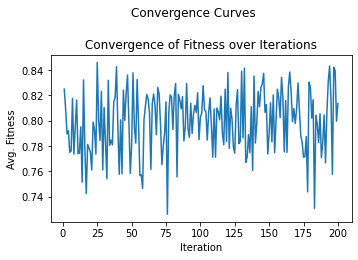

In [23]:
from Py_FS.wrapper.nature_inspired.PSO import PSO as pso
solution = pso(num_agents=30, max_iter=200, train_data=x, train_label=y, save_conv_graph=True)

In [24]:
solution.best_agent

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [25]:
for i,v in enumerate(solution.best_agent):
    if v == 1:
        print(x.columns[i])

rbc
hemo
pcv


In [26]:
solution.final_fitness

array([0.92708333, 0.91666667, 0.90625   , 0.90625   , 0.90625   ,
       0.89583333, 0.89583333, 0.88541667, 0.88541667, 0.875     ,
       0.875     , 0.86458333, 0.86458333, 0.86458333, 0.86458333,
       0.86458333, 0.86458333, 0.86458333, 0.85416667, 0.85416667,
       0.85416667, 0.85416667, 0.85416667, 0.84375   , 0.83333333,
       0.53125   , 0.52083333, 0.51041667, 0.51041667, 0.45833333])